# Zeckenstich Simulation mit Loop

Letzte Woche hattet ihr alle Punkte Zeckenstich-GeoDataFrame einmal zufällig verschoben. Nun wo ihr die Funktionsweise von Loops kennt, könnt ihr diesen Schritt eine beliebige Anzahl mal wiederholen. Um auf den Stand der letzten Woche zu kommen müsst ihr folgende Schritte ausführen: 

1. Importiert die notwenigen Module (pandas, geopandas, random) 
2. Importiert die notwendigen Functions (Point aus shapely.geometry sowie die selbst erstellte Function point_offset()) 
3. Importiert den Zeckenstichdatensatz
4. Rekonstruiert Übung 10 und 11 aus letzter Woche um die Zeckenstiche 1x zufällig zu verschieben

Der Code für diese Schritte 1 – 4 lauten folgendermassen:

In [29]:
# Schritt 1
import pandas as pd
import geopandas as gpd
import random

# Schritt 2
from shapely.geometry import Point

def point_offset(point, distance = 100):
    x_alt = point.x
    y_alt = point.y

    distance = int(distance)

    x_neu = x_alt + random.randrange(-distance,distance)
    y_neu = y_alt + random.randrange(-distance,distance)

    point_off = Point(x_neu, y_neu)

    return(point_off)

# Schritt 3
zeckenstiche = gpd.read_file("zeckenstiche.shp")

# Schritt 4
zeckenstiche_sim = gpd.GeoDataFrame()
zeckenstiche_sim["geometry"] = zeckenstiche["geometry"].apply(point_offset)
zeckenstiche_sim["ID"] = zeckenstiche["ID"]


## Übung 1: Mit For-Loop Monte Carlo Simulation durchführen 

Kombiniere den Code aus Schritt 4 (siehe vorherige Seite) mit deinem Wissen über Loops, um diese einmalige Verschiebung der Punkte 50-mal (mit `range(50)`) zu wiederholen. Denk daran: Du brauchst vor dem Loop eine leere Liste (z.B. `monte_carlo = []`) damit du den Output aus jedem Loop mit `append()`  abspeichern kannst. Erstelle auch eine neue Spalte `Run_Nr` mit der Nummer der Durchführung (die du vom Platzhalter erhältst).

```{figure} montepython.jpg
Quelle [twitter.com](https://twitter.com/GregoryRHancock/status/1179734188716707846?s=20)
```

<blockquote class="twitter-tweet"><p lang="en" dir="ltr">If someone does a Monte Carlo simulation study using Python, can we call it a “Monte Python” study? <br>Please?</p>&mdash; Gregory R. Hancock (@GregoryRHancock) <a href="https://twitter.com/GregoryRHancock/status/1179734188716707846?ref_src=twsrc%5Etfw">October 3, 2019</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script> 

In [30]:
monte_carlo = []
for i in range(50):
    zeckenstiche_sim = gpd.GeoDataFrame()
    zeckenstiche_sim["geometry"] = zeckenstiche["geometry"].apply(point_offset)
    zeckenstiche_sim["ID"] = zeckenstiche["ID"]
    zeckenstiche_sim["Run_Nr"] = i
    monte_carlo.append(zeckenstiche_sim)

## Übung 2: GeoDataFrames aus Simulation zusammenführen

Schau dir die Outputs an. 

- Mit `type()`: 
  - Was für ein Datentyp ist `zeckenstiche_sim`?
  - Was für ein Datentyp ist `monte_carlo`?
- Mit `len()`: 
  - Wie vielen Elemente hat `zeckenstiche_sim`?
  - Wie viele Elemente hat `monte_carlo`?

Worauf ich hinaus will: `zeckenstiche_sim` ist eine *GeoDataFrame* und `monte_carlo` ist eine Liste von *GeoDataFrames*. Glücklicherweise kann man eine Liste von ähnlichen GeoDataFrames (ähnlich im Sinne von: gleiche Spaltennamen und -typen) mit der Funktion `concat()` aus `pandas` zu einer einzigen *GeoDataFrame* zusammenführen. Führe die Funktion aus und speichere den Output als `monte_carlo_df`.  


In [31]:
type(zeckenstiche_sim)

geopandas.geodataframe.GeoDataFrame

In [32]:
type(monte_carlo)

list

In [33]:
len(zeckenstiche_sim)

1076

In [34]:
len(monte_carlo)

50

In [35]:
monte_carlo_df = pd.concat(monte_carlo)

## Übung 3: Simulierte Daten visualisieren

Exploriere nun `monte_carlo_df`? Was ist es für ein Datentyp? Was hat es für Spalten? Visualisiere den Datensatz räumlich mit `monte_carlo_df.plot()`. 
Optional: Wenn du Punkte mit der gleichen ID einer Farbe zuweisen möchtest, dann erreichst du dies mit der Option `column = "ID"` (das geht natürlich nur, wenn du im Loop auch eine solche Spalte erstellt hast)


In [36]:
monte_carlo_df.head()

,geometry,ID,Run_Nr
0,POINT (2679012.000 1240725.000),0,0
1,POINT (2679881.000 1240812.000),1,0
2,POINT (2687490.000 1240841.000),2,0
3,POINT (2674749.000 1240879.000),3,0
4,POINT (2681841.000 1240894.000),4,0


<AxesSubplot:>

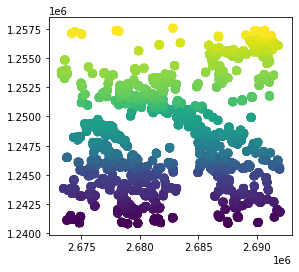

In [37]:
monte_carlo_df.plot(column = "ID")

In [38]:
monte_carlo_df.to_file("monte_carlo_df.shp")